Discrete Math 2 - Lecture  Answers

Name: Nicole Grace L. Joligon

Program and Year: BSCS- 1


# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

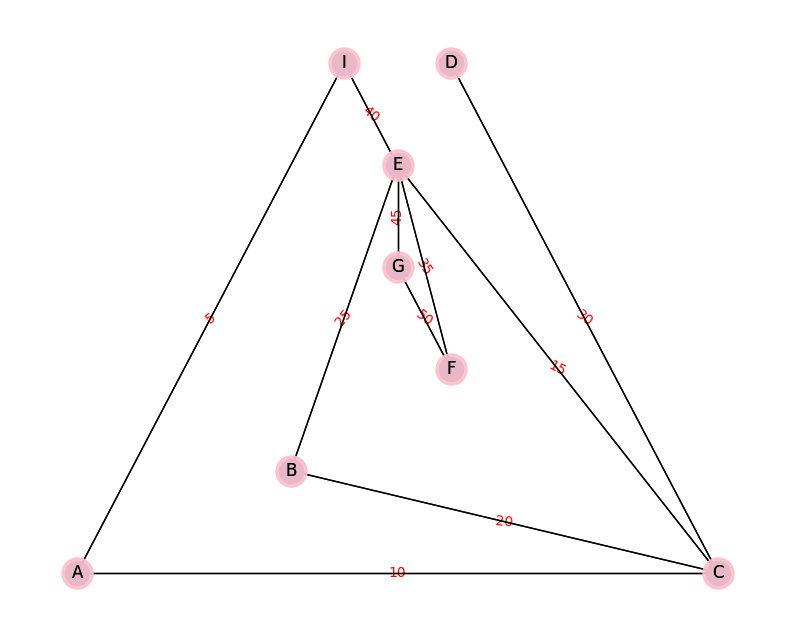

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{Kruskal's Algorithm}$


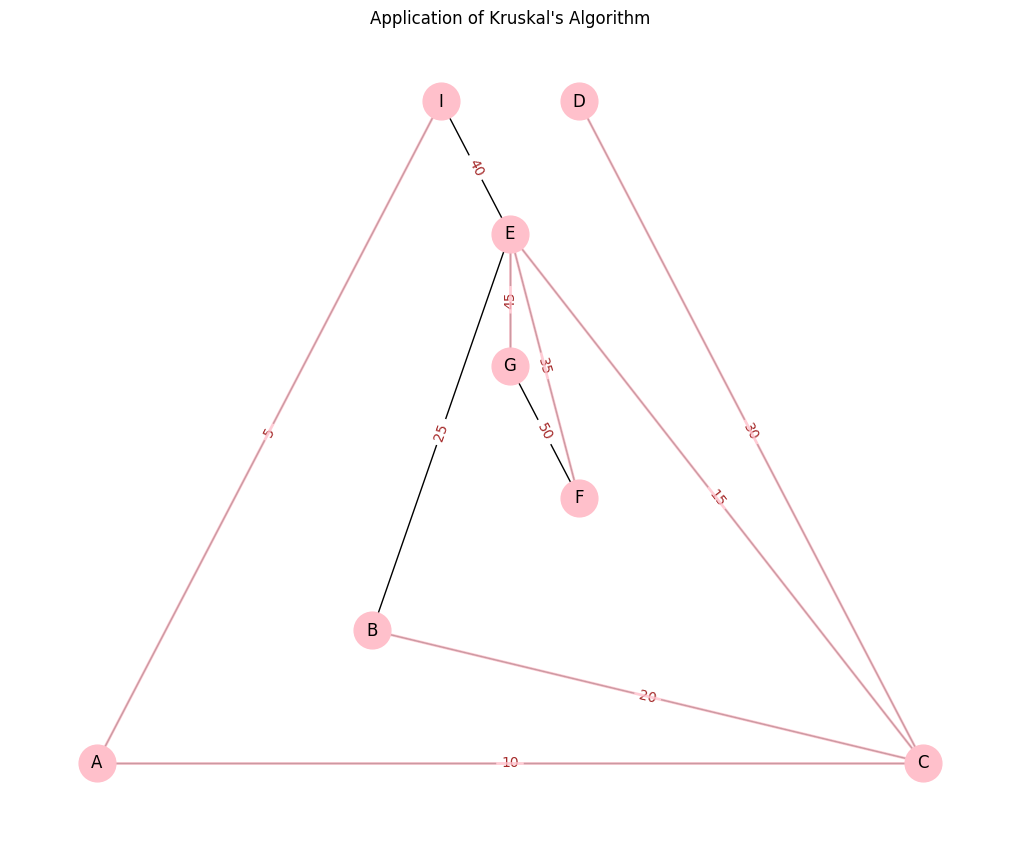

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph and set edge weights
G = nx.Graph()
edge_weights = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                ("F", "G"): 50, ("G", "E"): 45}

# Add edges with weights to the graph
for edge, weight in edge_weights.items():
    u, v = edge
    G.add_edge(u, v, weight=weight)

# Define the layout for the graph
pos = nx.planar_layout(G)

# Use Kruskal's algorithm to find the minimum spanning tree
mst = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal')

# Plot the original graph
plt.figure(figsize=(10, 8))

# Draw the original graph nodes and edges
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='brown')

# Highlight the edges of the MST in the graph
mst_edges = list(mst.edges(data=True))
mst_edges_list = [(edge[0], edge[1]) for edge in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges_list, edge_color='pink', width=2, alpha=0.8)

# Show the plot
plt.title("Application of Kruskal's Algorithm")
plt.show()

$\textbf{Prims's Algorithm}$

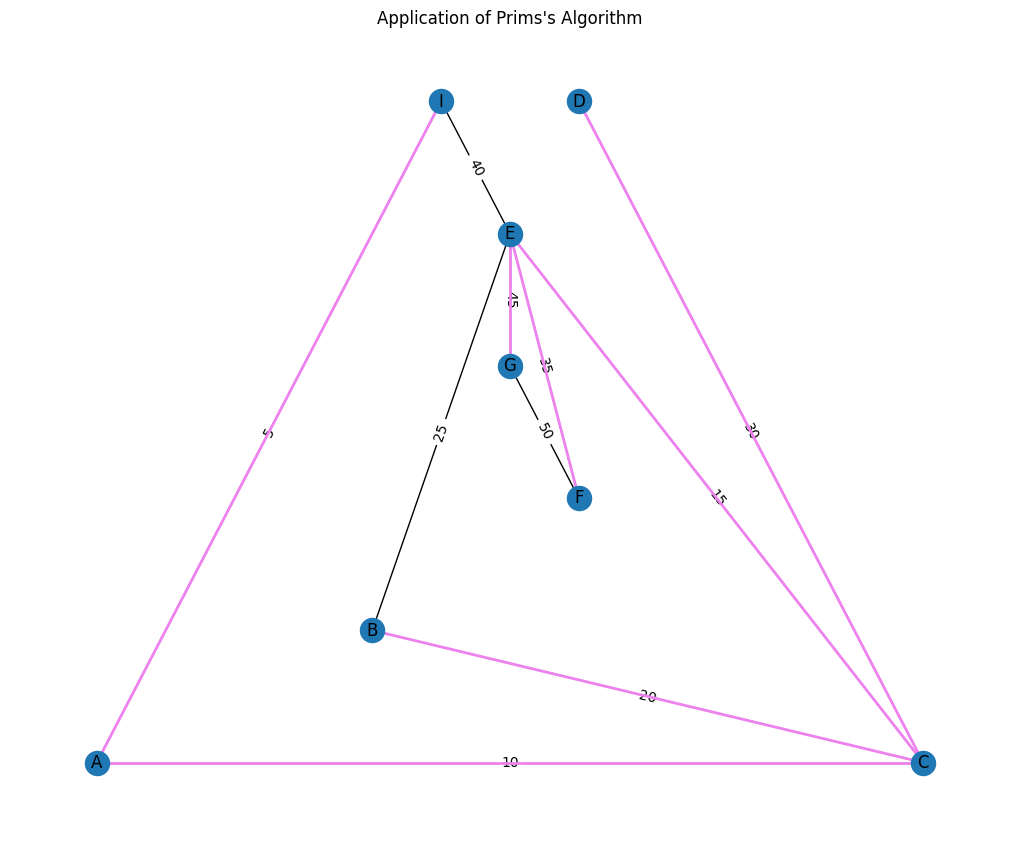

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Implement Prim's algorithm
def prim(graph):
    mst = nx.Graph()
    start_node = list(graph.nodes())[0]  # Start from an arbitrary node
    mst.add_node(start_node)
    while len(mst.nodes()) < len(graph.nodes()):
        min_edge = None
        min_weight = float('inf')
        for u in mst.nodes():
            for v, weight in graph[u].items():
                if v not in mst.nodes() and weight['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = weight['weight']
        if min_edge:
            u, v = min_edge
            mst.add_node(v)
            mst.add_edge(u, v, weight=min_weight)
    return mst

# Find the minimum spanning tree
mst = prim(G)

# Draw the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='violet', width=2)

plt.title("Application of Prims's Algorithm")
plt.show()

$\textbf{Djitraka's Algorithm}$

To node G: A -> C -> E -> G (length 70)


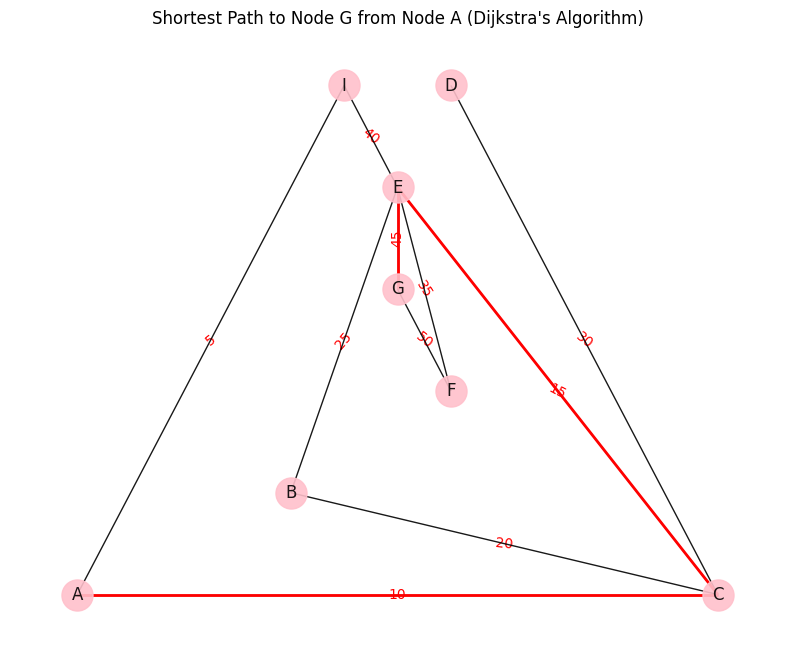

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Define layout
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw edges with labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

# Draw the original graph
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

# Find the shortest paths using Dijkstra's algorithm from node A
shortest_paths = nx.single_source_dijkstra_path(G, source="A", weight="weight")

# Highlight the shortest path to node G by coloring the corresponding edges in green
shortest_path_to_G = shortest_paths["G"]
for i in range(len(shortest_path_to_G) - 1):
    nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_to_G[i], shortest_path_to_G[i+1])], edge_color='orange', width=2)

# Print the shortest path to node G
print(f"To node G: {' -> '.join(shortest_path_to_G)} (length {nx.shortest_path_length(G, source='A', target='G', weight='weight')})")

plt.title("Application Dijkstra's Algorithm")
plt.show()